<a href="https://colab.research.google.com/github/com0040/README_example_Source/blob/main/39_%EC%88%98%EC%A7%91%ED%95%9C_%EB%89%B4%EC%8A%A4_%EA%B8%B0%EC%82%AC%EB%A1%9C_%EB%B9%88%EB%8F%84%EB%B6%84%EC%84%9D%ED%95%98%EA%B3%A0_%EC%9B%8C%EB%93%9C%ED%81%B4%EB%9D%BC%EC%9A%B0%EB%93%9C_%EA%B7%B8%EB%A6%AC%EA%B8%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# 한글폰트 // 검은 하트
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import matplotlib.pyplot as plt
from wordcloud import WordCloud # 워드클라우드 그려주는 라이브러리리
import numpy as np
from PIL import Image # 이미지 데이터 불러오고 처리하는 라이브러라라

In [ ]:
from tqdm import tqdm

total=[]

for n in tqdm(range(1,3992,10)):

    url=requests.get('https://search.naver.com/search.naver?where=news&sm=tab_pge&query=%ED%95%9C%EA%B5%AD&sort=0&photo=0&field=0&pd=0&ds=&de=&cluster_rank=90&mynews=0&office_type=0&office_section_code=0&news_office_checked=&nso=so:r,p:all,a:all&start={}'.format(n))
    html = BeautifulSoup(url.text)

    news=html.find('ul',class_='list_news').find_all('li',class_='bx')

    for i in news:
        title=i.find('a',class_='news_tit').text
        content=i.find('a',class_='api_txt_lines dsc_txt_wrap').text
        # print(title,content) 확인용
        total.append([title,content])

    time.sleep(1)


100%|██████████| 400/400 [11:28<00:00,  1.72s/it]


In [30]:
len(total)

4000

In [ ]:
df = pd.DataFrame(total,columns = ['제목','요약'])
df

,제목,요약
0,"尹대통령 지지율 28%…1%p 하락, 4주 연속 20%대[한국갤럽]",한국갤럽이 지난 11~13일 전국 성인 1천명을 대상으로 조사한 결과 윤 대통령이 ...
1,차이잉원 “1인당 GDP 한국 제치고 동아시아 1위”,대만의 1인당 국내총생산(GDP)이 올해 한국을 추월한다. 차이잉원 대만 총통은 이...
2,"추경호 만난 IMF 총재 ""한국, 과거 위기 가능성 없어""",기사내용 요약 미국 워싱턴DC서 만나 인플레 등 논의 한국의 외환보유액·경상수지 긍...
3,"한국, 5년만에 대북 독자제재… 北 개인15명·기관 16개 대상 추가","및 한국은행 총재의 사전 허가가 필요하며, 허가를 받지 않고 거래하는 경우 관련법에..."
4,"한국전기연구원, ‘2022 대한민국 SNS 대상’ 수상",경남 창원의 한국전기연구원(KERI)이 온라인 홍보 분야에서의 뛰어난 성과 공로를 ...
...,...,...
3995,"필리핀 ""전력 수급 차질 우려""…원전 재가동 놓고 한국과 협의중",원자력 발전을 위해 한국에 도움까지 구하며 대책 마련에 고심이다. 로이터통신 및 현...
3996,"""푸틴 동원령 피하자""…러시아인 男8명, 요트타고 한국 왔다",요트를 타고 수일을 항해해 한국 땅을 밟은 사람들도 있다. 10일(현지시간) 영국 ...
3997,"IMF, 올해 미국 성장률 1.6% '0.7%p↓'…한국, 2.6% '0.3%p↑'",이는 한국은행과 아시아개발은행(ADB) 전망과 동일한 수준이다. 경제협력개발기구(O...
3998,한국 추상미술 이끈 화백 장상의 60년 작품 세계,이천시립월전미술관 ‘빛과 넉: 장상의 60년’ 1960년부터 2020년대까지 60년...


In [ ]:
import re

text = '' # 문자열로 만들겠다다

for i in total:
    text += i[0] # total -> title
    text += '\n'
    text += i[1] # total -> content
    text += '\n'
    # print(i) # 확인용

len(text) 

618050

In [34]:
box=re.findall("[가-힣]{2,}",text) # findall <-> find_all
len(box)

111784

In [35]:
dic={}

for i in box:
    if i in dic:
        dic[i]+=1
    else:
        dic[i]=1
dic

{'대통령': 26,
 '지지율': 12,
 '하락': 13,
 '연속': 254,
 '한국갤럽': 30,
 '한국갤럽이': 19,
 '지난': 533,
 '전국': 81,
 '성인': 10,
 '천명을': 2,
 '대상으로': 106,
 '조사한': 12,
 '결과': 50,
 '대통령이': 20,
 '직무수행을': 6,
 '잘하고': 8,
 '있다': 560,
 '응답은': 12,
 '잘못하고': 6,
 '각각': 29,
 '집계됐다': 10,
 '지난주': 5,
 '조사': 55,
 '대비': 59,
 '긍정': 9,
 '평가는': 6,
 '포인트': 90,
 '차이잉원': 16,
 '인당': 41,
 '한국': 2380,
 '제치고': 9,
 '동아시아': 1,
 '대만의': 14,
 '국내총생산': 14,
 '올해': 277,
 '한국을': 169,
 '추월한다': 1,
 '대만': 31,
 '총통은': 4,
 '이같은': 8,
 '사실을': 3,
 '한국과': 103,
 '일본을': 16,
 '추월할': 8,
 '이라고': 33,
 '밝혔다': 622,
 '총통': 6,
 '연합뉴스': 36,
 '따르면': 197,
 '일본의': 19,
 '추경호': 81,
 '만난': 18,
 '총재': 44,
 '과거': 8,
 '위기': 40,
 '가능성': 20,
 '없어': 13,
 '기사내용': 30,
 '요약': 30,
 '미국': 398,
 '워싱턴': 50,
 '만나': 20,
 '인플레': 5,
 '논의': 24,
 '한국의': 391,
 '외환보유액': 2,
 '경상수지': 2,
 '평가': 13,
 '현재': 49,
 '경제를': 4,
 '평가했다': 14,
 '부총리는': 24,
 '현지시간': 208,
 '위치한': 101,
 '본부에서': 4,
 '게오르기에바': 8,
 '총재와': 4,
 '면담을': 1,
 '년만에': 28,
 '대북': 9,
 '독자제재': 12,
 '개인': 9,
 '기관': 25,
 '대상': 94,
 '추가': 

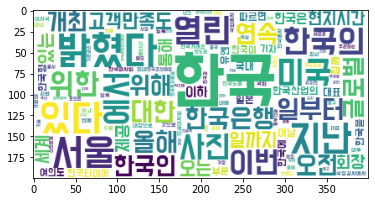

In [36]:
wc = WordCloud(font_path = 'BMDOHYEON_ttf.ttf',background_color='white')

cloud = wc.generate_from_frequencies(dic)
plt.imshow(cloud)

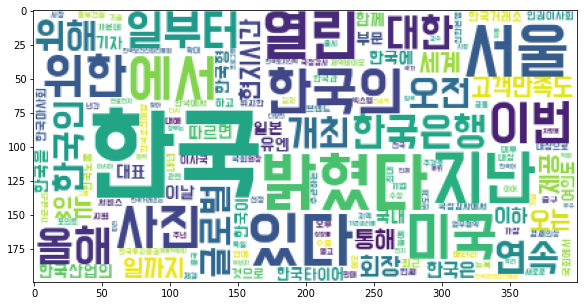

In [38]:
wc = WordCloud(font_path = 'BMDOHYEON_ttf.ttf',background_color='white')

plt.figure(figsize = (20,5))
cloud = wc.generate_from_frequencies(dic)
plt.imshow(cloud)

In [47]:
img = Image.open("하트.png") # 흰색에 가까울수록 255
# 0에 가까울수록 0
img = np.array(img)
img

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [245, 245, 245],
        [245, 245, 245],
        [245, 245, 245]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [245, 245, 245],
        [245, 245, 245],
        [245, 245, 245]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [245, 245, 245],
        [245, 245, 245],
        [245, 245, 245]],

       ...,

       [[245, 245, 245],
        [245, 245, 245],
        [245, 245, 245],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[245, 245, 245],
        [245, 245, 245],
        [245, 245, 245],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[245, 245, 245],
        [245, 245, 245],
        [245, 245, 245],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

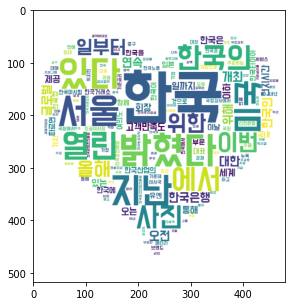

In [48]:
wc = WordCloud(font_path = 'BMDOHYEON_ttf.ttf',background_color='white',mask=img)

plt.figure(figsize = (20,5))
cloud = wc.generate_from_frequencies(dic)
plt.imshow(cloud)